In [38]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan 
from sklearn.cluster import DBSCAN

In [20]:
per_category = pd.read_csv('/Users/blackrose/Desktop/dsmp-2024-group-38/bs_mapped_transactional_data_new_2.csv')
per_category

,Unnamed: 0,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,group
0,0,10371.0,4.00,CINEMA,01/01/2025,Cinema
1,1,88339.0,2.40,40544,01/01/2025,NaN
2,2,18555.0,2.40,85149,01/01/2025,NaN
3,3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Cafe
4,4,80792.0,1.95,18555,01/01/2025,NaN
...,...,...,...,...,...,...
10148275,10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025,Cafe
10148276,10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025,Cafe
10148277,10148277,57569.0,14.00,WINE_BAR,31/12/2025,Bar
10148278,10148278,1490.0,9.00,57569,31/12/2025,NaN


In [21]:
per_category = per_category.dropna(subset=['group'])
print(per_category)

          Unnamed: 0  from_totally_fake_account  monopoly_money_amount  \
0                  0                    10371.0                   4.00   
3                  3                    18555.0                   4.10   
5                  5                    18555.0                   4.45   
6                  6                    18555.0                   1.45   
7                  7                    18555.0                   5.00   
...              ...                        ...                    ...   
10148274    10148274                    81404.0                   1.80   
10148275    10148275                    32185.0                   2.65   
10148276    10148276                    32185.0                   2.45   
10148277    10148277                    57569.0                  14.00   
10148279    10148279                    53444.0                   2.65   

         to_randomly_generated_account not_happened_yet_date   group  
0                               CINEMA  

In [22]:
per_category = per_category.pivot_table(index='from_totally_fake_account',
                                columns='group',
                                values='monopoly_money_amount',
                                aggfunc='mean')

per_category.head(20)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Home,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,NaN,38.326667,11.895753,8.000000,NaN,2.404920,80.000000,6.146341,145.000000,NaN,...,46.500000,25.190476,15.157426,34.327447,22.726667,NaN,8.99,85.241250,NaN,NaN
1002.0,NaN,51.656667,11.846698,NaN,NaN,2.348301,67.000000,6.180000,NaN,NaN,...,NaN,NaN,16.369496,31.992979,20.606667,87.500000,8.99,95.055455,NaN,NaN
1006.0,NaN,21.590000,11.776316,11.444444,21.521449,2.428012,59.200000,5.820513,65.000000,16.555556,...,44.000000,NaN,15.574400,30.310769,31.360000,NaN,8.99,20.693333,NaN,NaN
1018.0,NaN,19.995000,5.955986,10.000000,21.617021,2.507692,59.000000,5.600000,118.176471,NaN,...,71.000000,30.000000,6.400000,34.061923,26.365000,84.000000,NaN,23.003929,NaN,NaN
1053.0,NaN,59.990000,11.774510,NaN,18.000000,2.688333,33.250000,6.166667,111.347826,NaN,...,42.454545,NaN,13.153661,19.236889,31.817500,115.000000,8.99,86.093846,79.0,NaN
1059.0,NaN,10.000000,12.035294,10.434783,NaN,2.392663,50.764706,4.000000,128.000000,NaN,...,NaN,NaN,15.006667,35.029767,34.015000,68.666667,NaN,67.843125,NaN,NaN
1071.0,NaN,36.990000,6.470370,17.500000,30.000000,2.473515,13.000000,6.968750,NaN,23.000000,...,NaN,NaN,10.407987,33.524390,22.120000,68.384615,8.99,100.036667,235.5,NaN
1078.0,NaN,16.995000,12.070621,NaN,15.923077,2.397773,49.642857,6.523810,NaN,13.333333,...,NaN,NaN,15.547470,31.175111,39.090000,80.500000,8.99,90.596557,NaN,NaN
1086.0,NaN,56.790000,5.773529,12.500000,22.218182,2.470244,52.045455,6.243902,116.600000,NaN,...,51.750000,60.000000,11.298896,31.097143,38.033333,117.000000,8.99,23.457083,NaN,NaN


Replace NaNs where people haven't spent money to 0.

In [23]:
per_category = per_category.fillna(0)
per_category.head(10)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Home,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,0.0,38.326667,11.895753,8.000000,0.000000,2.404920,80.000000,6.146341,145.000000,0.000000,...,46.500000,25.190476,15.157426,34.327447,22.726667,0.000000,8.99,85.241250,0.0,0.0
1002.0,0.0,51.656667,11.846698,0.000000,0.000000,2.348301,67.000000,6.180000,0.000000,0.000000,...,0.000000,0.000000,16.369496,31.992979,20.606667,87.500000,8.99,95.055455,0.0,0.0
1006.0,0.0,21.590000,11.776316,11.444444,21.521449,2.428012,59.200000,5.820513,65.000000,16.555556,...,44.000000,0.000000,15.574400,30.310769,31.360000,0.000000,8.99,20.693333,0.0,0.0
1018.0,0.0,19.995000,5.955986,10.000000,21.617021,2.507692,59.000000,5.600000,118.176471,0.000000,...,71.000000,30.000000,6.400000,34.061923,26.365000,84.000000,0.00,23.003929,0.0,0.0
1053.0,0.0,59.990000,11.774510,0.000000,18.000000,2.688333,33.250000,6.166667,111.347826,0.000000,...,42.454545,0.000000,13.153661,19.236889,31.817500,115.000000,8.99,86.093846,79.0,0.0
1059.0,0.0,10.000000,12.035294,10.434783,0.000000,2.392663,50.764706,4.000000,128.000000,0.000000,...,0.000000,0.000000,15.006667,35.029767,34.015000,68.666667,0.00,67.843125,0.0,0.0
1071.0,0.0,36.990000,6.470370,17.500000,30.000000,2.473515,13.000000,6.968750,0.000000,23.000000,...,0.000000,0.000000,10.407987,33.524390,22.120000,68.384615,8.99,100.036667,235.5,0.0
1078.0,0.0,16.995000,12.070621,0.000000,15.923077,2.397773,49.642857,6.523810,0.000000,13.333333,...,0.000000,0.000000,15.547470,31.175111,39.090000,80.500000,8.99,90.596557,0.0,0.0
1086.0,0.0,56.790000,5.773529,12.500000,22.218182,2.470244,52.045455,6.243902,116.600000,0.000000,...,51.750000,60.000000,11.298896,31.097143,38.033333,117.000000,8.99,23.457083,0.0,0.0


In [24]:
X_train, X_test = train_test_split(per_category, test_size=0.25, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Text(0.5, 1.0, 'The elbow method showing the optimal k')

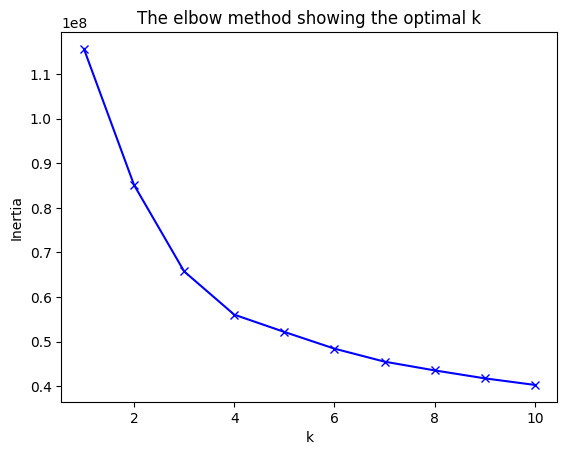

In [26]:
# loop over values of k from 1 to 10
inertias = []
K = 10
for k in range(1, K+1):
    # instantiate the KMeans class with k clusters
    kmeans = KMeans(n_clusters= k)
    
    # fit the model to the data
    kmeans.fit(X_train)

    # store the value of the inertia for this value of k
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')




In [31]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# predict clusters for the test data
test_clusters = kmeans.predict(X_train)

# evaluate the clustering performance
silhouette_avg = silhouette_score(X_train, test_clusters)
print("Silhouette Score:", silhouette_avg)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.2595362823139116


In [42]:
# initialize HDBSCAN
clusterer = hdbscan.HDBSCAN()

# fit model
clusterer.fit(X_train)

# predict clusters for the test data
test_clusters = clusterer.fit_predict(X_train)

# evaluate the clusters
silhouette_avg = silhouette_score(X_train, test_clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.8644859897854097


In [43]:
# count the number of unique cluster labels
num_clusters = len(np.unique(clusterer.labels_)) - 1  # Exclude noise points (-1)
print("Number of clusters identified:", num_clusters)

Number of clusters identified: 3


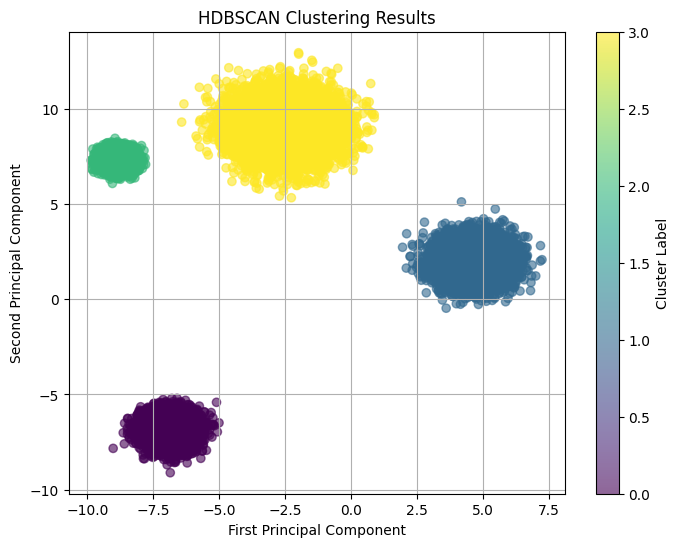

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=test_clusters, cmap='viridis', alpha=0.6)
plt.title("HDBSCAN Clustering Results")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()
